In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('comp_train.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [83]:
df.isnull().mean()


PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [84]:
df.drop(columns=['Cabin'],inplace=True)


In [4]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.impute import SimpleImputer
# tr1=ColumnTransformer(transformers=['Embark',SimpleImputer(strategy='most_frequent'),[10]],remainder='passthrough')
# df=np.array(tr1.fit_transform(df))
# tr2=ColumnTransformer(transformers=['Embark',OneHotEncoder(sparse='False'),[10]],remainder='passthrough')

In [85]:
df['Embarked'].value_counts()
df["Embarked"]=df['Embarked'].fillna("S")

In [86]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.000000
dtype: float64

In [87]:
df=df.rename(columns={'Embarked':'Embark'})

In [88]:
df=pd.get_dummies(df,columns=['Embark'],drop_first=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embark_Q,Embark_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,0,0


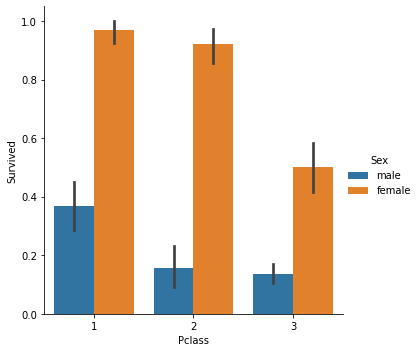

In [91]:
sns.catplot(x='Pclass',y='Survived',kind='bar',data=df,hue='Sex')


In [92]:
df.to_csv('Comp_train_preprocess.csv', index=False)

In [98]:
df.values
df.drop(["Name","Ticket"],axis=1,inplace=True)
df['Sex']=df['Sex'].replace(['male','female'],['0','1'])
df['Age']=df['Age'].fillna(df['Age'].mean())
df


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embark_Q,Embark_S
0,1,0,3,0,22.000000,1,0,7.2500,0,1
1,2,1,1,1,38.000000,1,0,71.2833,0,0
2,3,1,3,1,26.000000,0,0,7.9250,0,1
3,4,1,1,1,35.000000,1,0,53.1000,0,1
4,5,0,3,0,35.000000,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,13.0000,0,1
887,888,1,1,1,19.000000,0,0,30.0000,0,1
888,889,0,3,1,29.699118,1,2,23.4500,0,1
889,890,1,1,0,26.000000,0,0,30.0000,0,0


In [99]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df.drop(columns=['Survived']),df['Survived'],test_size=0.2,random_state=42)

In [100]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [101]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [103]:
Y_predict=lr.predict(X_test)

In [105]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_test,Y_predict)
print(cm)
accuracy_score(Y_test,Y_predict)

[[90 15]
 [21 53]]


0.7988826815642458